### 高维数据向低维数据映射

In [1]:
# 使用sk中的PAC 
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

In [2]:
# 手写数据 
digits = datasets.load_digits()
X = digits.data
y =digits.target

In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [4]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_train)
knn_clf.score(X_test,y_test)

0.9822222222222222

In [5]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_train_reduction= pca.transform(X_train)
X_test_reduction= pca.transform(X_test)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf1 = KNeighborsClassifier()
knn_clf1.fit(X_train_reduction,y_train)
knn_clf1.score(X_test_reduction,y_test)

0.6111111111111112

In [7]:
pca.explained_variance_ratio_  # 表示第一个轴可以解释原本数据的15%的方差，第二个轴可以解释13%的方差

array([0.15738434, 0.1336076 ])

In [8]:
# 查看特征数变化随之可解释的方差的变化
pca = PCA(n_components=X_train.shape[1])
pca.fit(X_train)
X_train_reduction= pca.transform(X_train)
pca.explained_variance_ratio_ 

array([1.57384340e-01, 1.33607598e-01, 1.16736721e-01, 8.32676614e-02,
       5.71201087e-02, 4.80915729e-02, 4.22605520e-02, 3.79222585e-02,
       3.42213833e-02, 3.02039784e-02, 2.46204750e-02, 2.18654867e-02,
       1.82288902e-02, 1.79277875e-02, 1.45630128e-02, 1.39637146e-02,
       1.29012278e-02, 1.23268171e-02, 1.01442242e-02, 8.62817311e-03,
       8.59128632e-03, 7.89098421e-03, 7.51177037e-03, 7.08920550e-03,
       6.98554229e-03, 5.86174913e-03, 5.65395899e-03, 5.07346230e-03,
       4.82206304e-03, 4.21056714e-03, 3.78148500e-03, 3.58239350e-03,
       3.35785966e-03, 3.18649199e-03, 2.99842440e-03, 2.92305709e-03,
       2.53414502e-03, 2.29123182e-03, 2.10729375e-03, 2.05076049e-03,
       1.86332341e-03, 1.62912363e-03, 1.47200717e-03, 1.33864019e-03,
       1.16307169e-03, 1.03449759e-03, 9.21732586e-04, 7.49169911e-04,
       5.32955314e-04, 3.82034870e-04, 2.16236252e-04, 8.57103023e-05,
       4.80138758e-05, 3.86399031e-05, 1.82879733e-05, 8.50815499e-06,
      

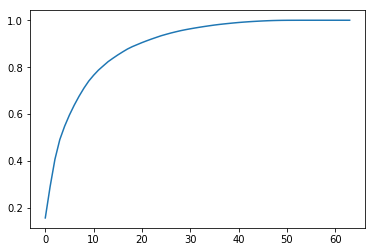

In [9]:
plt.plot([i for i in range(X_train.shape[1])],[np.sum(pca.explained_variance_ratio_[:i+1]) for i in range(X_train.shape[1]                                                                                         )])
plt.show()

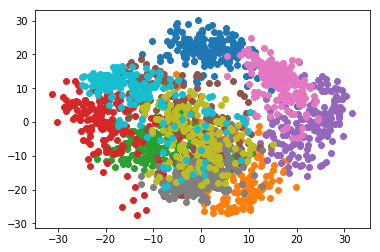

In [10]:
# 降维方便可视化 
pca = PCA(n_components=2)
pca.fit(X)
X_train_reduction= pca.transform(X)
X_train_reduction.shape
for i in range(10):
    plt.scatter(X_train_reduction[y==i,0],X_train_reduction[y==i,1])
plt.show()